In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Explatory analysis

In [3]:
admission = pd.read_csv("../input/graduate-admissions/Admission_Predict.csv")
#printing first five lines
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission.describe() #describe the data values such as mean std etc.


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# **Reading Null Values********

In [5]:
Null  = admission.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
admission.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


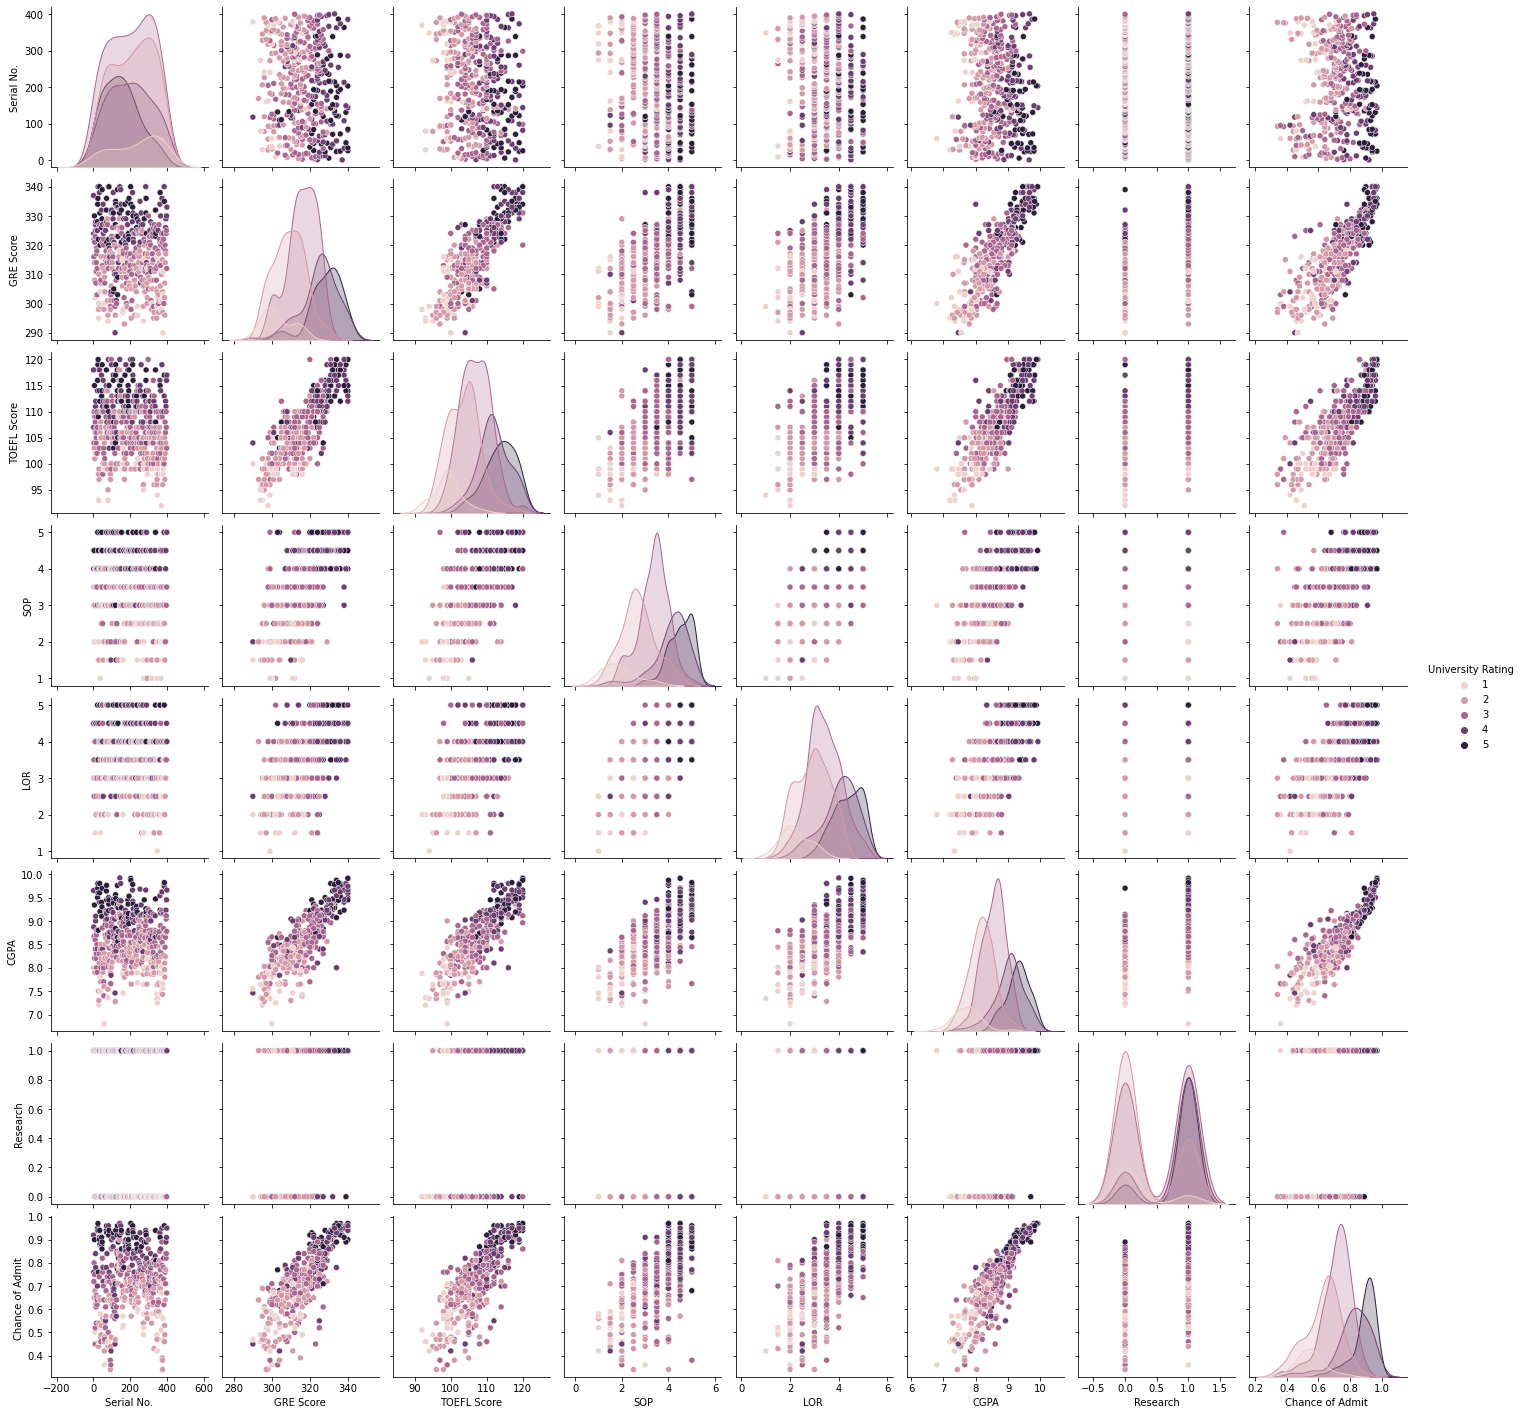

In [7]:
sns.pairplot(data=admission,kind="scatter",hue="University Rating")
plt.title = "pairwise plot"
plt.show()

# **CGPA Vs GRE Score**

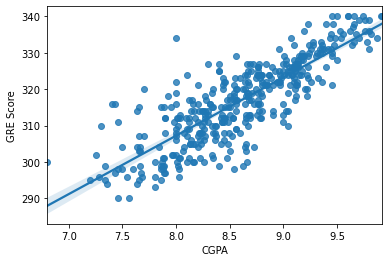

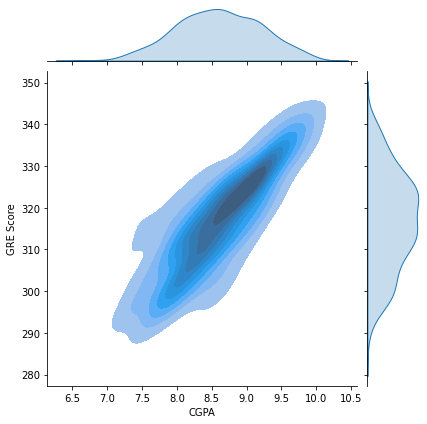

In [8]:
sns.regplot(data=admission,x='CGPA',y='GRE Score')
sns.jointplot(x=admission['CGPA'],y=admission['GRE Score'],kind='kde',fill=True)

plt.show() 
        

# CGPA vs Vhance Of Admit

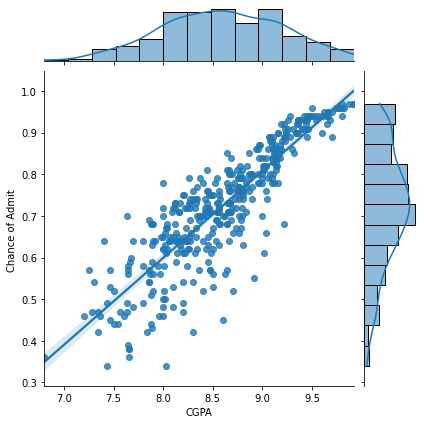

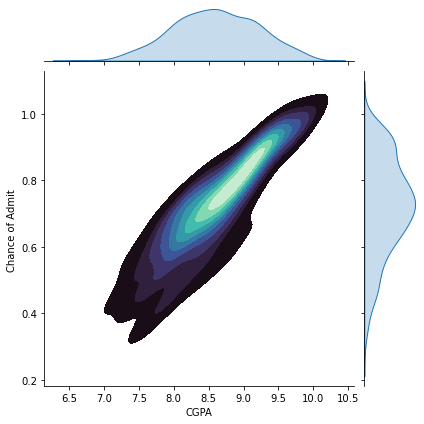

In [9]:
sns.jointplot(x = 'CGPA',y ='Chance of Admit ',data = admission,kind = 'reg')

plt.show()

sns.jointplot(x = 'CGPA',y ='Chance of Admit ',data = admission,kind = 'kde',fill = True,cmap="mako")

plt.show()

# GRE Score vs Chance of Admit

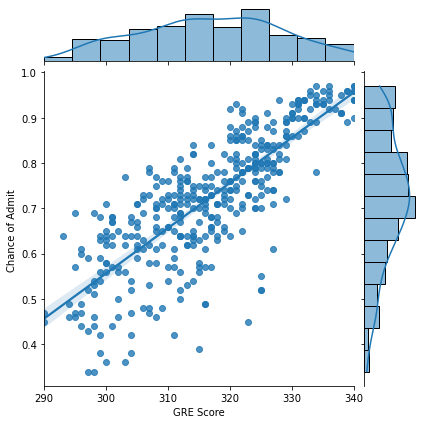

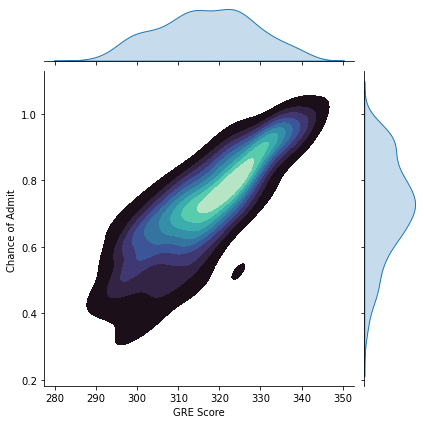

In [10]:
sns.jointplot(x = 'GRE Score',y ='Chance of Admit ',data = admission,kind = 'reg')

plt.show()

sns.jointplot(x = 'GRE Score',y ='Chance of Admit ',data = admission,kind = 'kde',fill = True,cmap="mako")

plt.show()

# MODEl

since relationship is linear we can use regression model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [12]:
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA']

In [13]:
x= admission[features]
y= admission['Chance of Admit ']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=9,test_size=0.25)
    

In [14]:
model= LinearRegression()
# fitting of model
model.fit(x_train,y_train)
#prediction of model
pred = model.predict(x_test)
#mean square error and Root mean square error
print("MSE :",mean_squared_error(y_test,pred))
print("RMSE :", (mean_squared_error(y_test,pred))**0.5)
print("r2_score",r2_score(y_test,pred))

MSE : 0.00335188026039119
RMSE : 0.057895425211247825
r2_score 0.8346419584187028


# Visualise Prediction

<AxesSubplot:xlabel='Chance of Admit '>

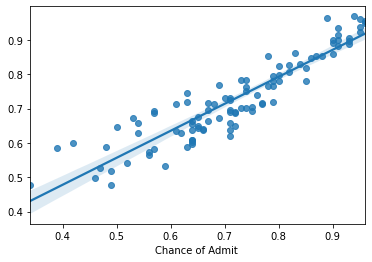

In [15]:
sns.regplot(x=y_test,y=pred)


In [16]:
print('Your chances of getting admission in US is : {}%'.format(round(model.predict([[300, 108, 4, 4.5, 4.5, 8.35]])[0]*100, 1)))

Your chances of getting admission in US is : 69.1%
